# Analisis productos con descuentos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
from matplotlib import rcParams
from scipy.stats import chi2_contingency,ttest_ind
from itertools import combinations
from scipy import stats
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
df = pd.read_csv('dataset_clean.csv', index_col='id')
df.head()

,price,base_price,initial_quantity,available_quantity,original_price,sold_quantity,health,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.completed,...,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.level_id,dias_garantia,dias_garantia_otro,antiguedad_vendedor,antiguedad_publicacion,antiguedad_actualizacion_publicacion,flag_descuento,monto descuento,porcentaje descuento
id,,,,,,,,,,,,,,,,,,,,,
MLA883365318,59200.0,59200.0,17,10,NaN,7,NaN,10679.0,520.0,10159.0,...,60.0,5.0,30.0,30.0,3279.0,110,4,False,NaN,NaN
MLA898926425,61999.0,61999.0,128,61,NaN,67,NaN,19798.0,1099.0,18699.0,...,60.0,5.0,360.0,360.0,1071.0,62,3,False,NaN,NaN
MLA896793334,3711.0,3711.0,2347,943,NaN,1404,NaN,161983.0,11754.0,150229.0,...,60.0,5.0,360.0,360.0,3158.0,77,3,False,NaN,NaN
MLA884683677,62999.0,62999.0,1208,500,NaN,500,1.0,205987.0,8993.0,196994.0,...,60.0,5.0,360.0,360.0,199.0,100,3,False,NaN,NaN
MLA878643073,62999.0,62999.0,153,1,NaN,100,1.0,205987.0,8993.0,196994.0,...,60.0,5.0,360.0,360.0,199.0,136,3,False,NaN,NaN


In [3]:
variablesCuantitativas = df.select_dtypes(include=['float64','int64']).columns
variablesCualitativas = df.select_dtypes(exclude=['float64','int64']).columns

In [4]:
df[variablesCuantitativas].head()

,price,base_price,initial_quantity,available_quantity,original_price,sold_quantity,health,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.completed,...,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.level_id,dias_garantia,dias_garantia_otro,antiguedad_vendedor,antiguedad_publicacion,antiguedad_actualizacion_publicacion,monto descuento,porcentaje descuento
id,,,,,,,,,,,,,,,,,,,,,
MLA883365318,59200.0,59200.0,17,10,NaN,7,NaN,10679.0,520.0,10159.0,...,60.0,60.0,5.0,30.0,30.0,3279.0,110,4,NaN,NaN
MLA898926425,61999.0,61999.0,128,61,NaN,67,NaN,19798.0,1099.0,18699.0,...,60.0,60.0,5.0,360.0,360.0,1071.0,62,3,NaN,NaN
MLA896793334,3711.0,3711.0,2347,943,NaN,1404,NaN,161983.0,11754.0,150229.0,...,60.0,60.0,5.0,360.0,360.0,3158.0,77,3,NaN,NaN
MLA884683677,62999.0,62999.0,1208,500,NaN,500,1.0,205987.0,8993.0,196994.0,...,60.0,60.0,5.0,360.0,360.0,199.0,100,3,NaN,NaN
MLA878643073,62999.0,62999.0,153,1,NaN,100,1.0,205987.0,8993.0,196994.0,...,60.0,60.0,5.0,360.0,360.0,199.0,136,3,NaN,NaN


In [5]:
df[variablesCualitativas].head()

,listing_type_id,condition,domain_id,category_name,shipping.free_shipping,shipping.mode,shipping.logistic_type,shipping.store_pick_up,address.state_name,address.city_name,seller.seller_reputation.power_seller_status,category_settings.sub_vertical,category_settings.vertical,product_Marca,product_Condición del ítem,product_Línea,sale_terms_Tipo de garantía,flag_descuento
id,,,,,,,,,,,,,,,,,,
MLA883365318,gold_pro,new,MLA-TELEVISIONS,Televisores,True,me2,fulfillment,False,Capital Federal,Palermo,platinum,TV,consumer_electronics,Philips,Nuevo,Smart TV LED 4K UHD,Garantía de fábrica,False
MLA898926425,gold_special,new,MLA-TELEVISIONS,Televisores,True,me2,fulfillment,False,Capital Federal,Núñez,platinum,TV,consumer_electronics,Samsung,Nuevo,Series 7,Garantía de fábrica,False
MLA896793334,gold_special,new,MLA-STREAMING_MEDIA_DEVICES,Media Streaming,True,me2,cross_docking,False,Capital Federal,Balvanera,platinum,electronics,consumer_electronics,Noga,Nuevo,smart tv box,Garantía de fábrica,False
MLA884683677,gold_pro,new,MLA-TELEVISIONS,Televisores,True,me2,fulfillment,False,Buenos Aires,Villa Celina,platinum,TV,consumer_electronics,Samsung,Nuevo,Series 7,Garantía de fábrica,False
MLA878643073,gold_pro,new,MLA-TELEVISIONS,Televisores,True,me2,fulfillment,False,Buenos Aires,Villa Celina,platinum,TV,consumer_electronics,Samsung,Nuevo,Series 7,Garantía de fábrica,False


## Distribucion de los porcentajes de descuento

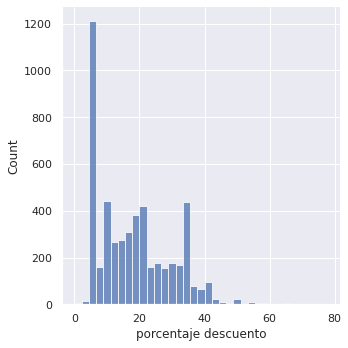

In [6]:
sns.displot(df, x='porcentaje descuento')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='porcentaje descuento'>

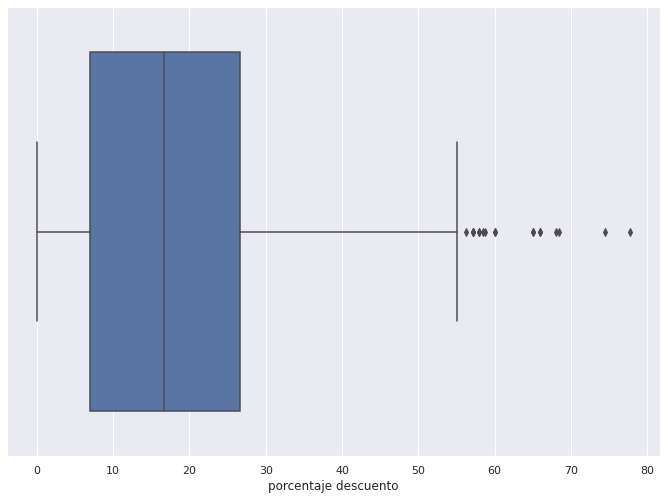

In [7]:
sns.boxplot('porcentaje descuento', data=df)

In [8]:
df['porcentaje descuento'].describe()

count    5085.000000
mean       18.298874
std        11.621440
min         0.000000
25%         7.000700
50%        16.670580
75%        26.562500
max        77.795066
Name: porcentaje descuento, dtype: float64

**El porcentaje de descuento tiene un sesgo positivo con el 50% de las observaciones entre 26 y 7 puntos de descuento. Existen muy pocos productos que tengan un descuento superior al 55%, los mismos se consideran atipicos**

## Categorias de productos

### Proporcion de productos que tienen descuentos

In [9]:
aux = df.groupby("category_name").filter(lambda x: len(x) > 1000) # Me quedon con las categorias que tienen mas de 1000 productos, para no obtener una proporcion no estadistica
aux2 = pd.crosstab(aux.category_name,df.flag_descuento.map(lambda x: str(x)+'_proporcion'), normalize='index')
aux = aux2.join(pd.crosstab(aux.category_name,df.flag_descuento),rsuffix='valores')

aux.sort_values(by='True_proporcion', ascending=False).head(10)

flag_descuento,False_proporcion,True_proporcion,False,True
category_name,,,,
Cámaras,0.757253,0.242747,783,251
Soportes,0.867635,0.132365,1075,164
PC,0.870560,0.129440,1446,215
Auriculares,0.896076,0.103924,1690,196
Notebooks,0.927350,0.072650,7595,595
Televisores,0.938067,0.061933,2893,191
Impresoras,0.946812,0.053188,3222,181
Lavarropas y Lavasecarropas,0.950153,0.049847,3412,179
Videojuegos,0.952868,0.047132,3821,189


**Dentro de las categorias con una venta superiore a 1000 productos, se puede identificar que el 24.17% de las camaras fotograficas tienen algun tipo de decuento dentro del dataset analizado**

### Categorias principales con descuentos

In [10]:
print("10 Categorias principales con descuentos")
categoriasPrincipalesDescuento = df[df.flag_descuento == True].category_name.value_counts(normalize=True)[:10]
print(categoriasPrincipalesDescuento)
print('-----')
print("Agrupan el %0.3f de productos con descuento"%(categoriasPrincipalesDescuento.sum() * 100))

10 Categorias principales con descuentos
Notebooks                      0.117011
Cámaras                        0.049361
PC                             0.042281
Auriculares                    0.038545
Televisores                    0.037561
Videojuegos                    0.037168
Impresoras                     0.035595
Lavarropas y Lavasecarropas    0.035202
Soportes                       0.032252
Monitores                      0.031072
Name: category_name, dtype: float64
-----
Agrupan el 45.605 de productos con descuento


<AxesSubplot:xlabel='count', ylabel='category_name'>

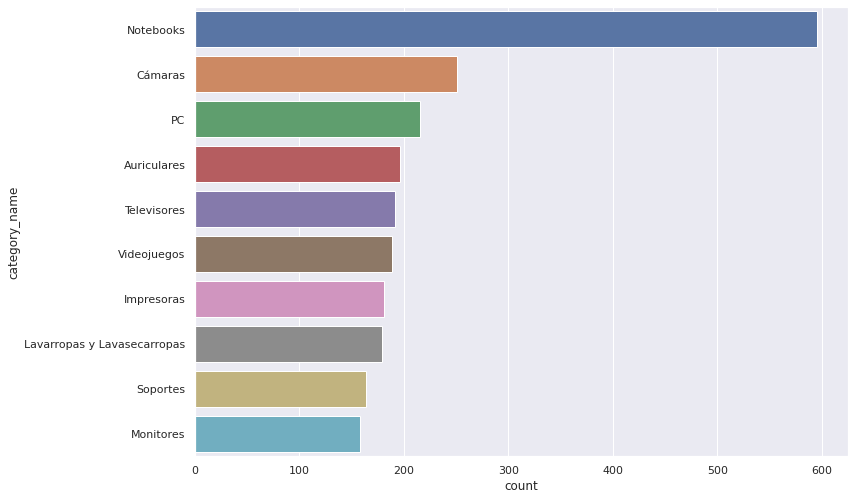

In [11]:
sns.countplot(y="category_name", data=df[(df.flag_descuento == True) & 
                                         (df.category_name.isin(categoriasPrincipalesDescuento.index))],
             order = df[(df.flag_descuento == True) & 
                  (df.category_name.isin(categoriasPrincipalesDescuento.index))]['category_name'].value_counts().index )

**Dentro de los productos con descuentos las notebooks son las que tienen la mayor cantidad de descuentos, pero esta cantidad representa solamente el 7% de las publicaciones de notebooks. La categoria con la mayor proporcion de productos con descuentos resulta ser las camaras fotograficas, alrededor del 24%**

### Distribucion porcentajes de descuentos por categorias

<AxesSubplot:xlabel='porcentaje descuento', ylabel='category_name'>

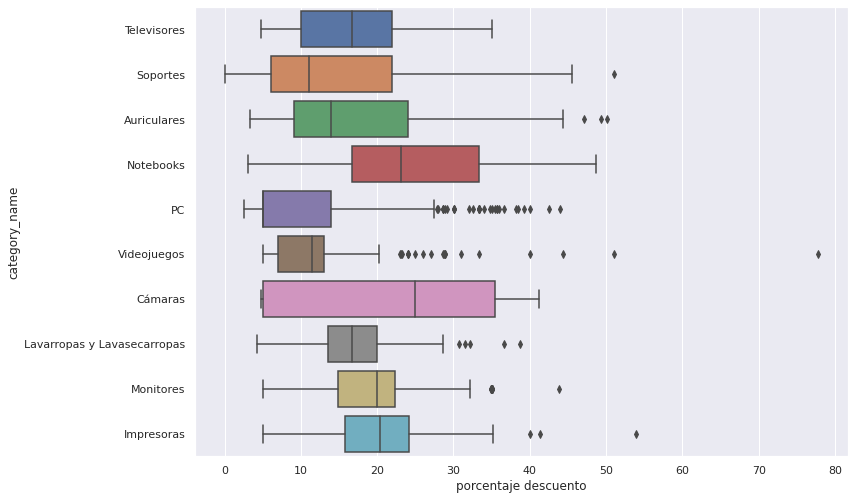

In [12]:
aux = df[(df.flag_descuento == True) & (df.category_name.isin(categoriasPrincipalesDescuento.index))]
sns.boxplot(y='category_name',x='porcentaje descuento', data=aux)

In [13]:
aux.groupby(by='category_name')['porcentaje descuento'].describe()

,count,mean,std,min,25%,50%,75%,max
category_name,,,,,,,,
Auriculares,196.0,17.227811,10.998253,3.261649,9.072612,14.000000,24.000042,50.055617
Cámaras,251.0,21.037689,15.679809,4.807692,5.000000,24.987481,35.483854,41.176471
Impresoras,181.0,20.308647,8.988017,5.000000,15.790305,20.323236,24.173565,53.893865
Lavarropas y Lavasecarropas,179.0,16.120889,6.227812,4.301122,13.509783,16.666944,20.000200,38.667182
Monitores,158.0,18.794067,8.369273,4.995249,14.894278,20.000609,22.334636,43.786095
Notebooks,595.0,23.891457,10.304175,2.999936,16.666765,23.077692,33.337736,48.623527
PC,215.0,11.085306,10.997507,2.564135,4.999631,5.000096,14.000060,44.000880
Soportes,164.0,15.156653,10.476479,0.000000,6.026528,11.000000,21.907859,51.020000
Televisores,191.0,17.078471,8.234298,4.762018,10.005367,16.667181,21.875329,35.000438


**Las camaras son las que tienen una mayor variacion en el porcentaje de descuento, el 50% de la poblacion central se encontrara entre 5% y 35%**

**Las computadoras tienen una mayor cantidad de valores atipicos, el 75% de las mismas tendran un descuento menor al 15%**

**Las notebooks y las camaras son los productos que tienen los mayores porcentaje de descuentos**

# Descuentos por ciudad

In [22]:
aux = df.groupby("address.city_name").filter(lambda x: len(x) > 1000) # Me quedon con las categorias que tienen mas de 1000 productos, para no obtener una proporcion no estadistica
ciudadesMasImportantes = aux[aux.flag_descuento == True]["address.city_name"].value_counts(normalize=True)[:10]
aux2 = pd.crosstab(aux['address.city_name'],df.flag_descuento.map(lambda x: str(x)+'_proporcion'), normalize='index')
aux = aux2.join(pd.crosstab(aux['address.city_name'],df.flag_descuento),rsuffix='valores')

aux.sort_values(by='True_proporcion', ascending=False).head(10)

flag_descuento,False_proporcion,True_proporcion,False,True
address.city_name,,,,
Villa Crespo,0.804149,0.195851,1667,406
Recoleta,0.898262,0.101738,1757,199
Palermo,0.920696,0.079304,2856,246
Belgrano,0.933352,0.066648,3263,233
Balvanera,0.934448,0.065552,2067,145
Monserrat,0.936479,0.063521,1032,70
Caballito,0.938990,0.061010,4371,284
Villa Devoto,0.940719,0.059281,968,61
San Nicolás,0.941765,0.058235,1601,99


**La ciudad que tiene una mayor proporcion de descuentos corresponde a Villa Crespo con alrededor del 19% de productos con descuentos**

In [15]:
# Distribucion de los descuentos por cada ciudad
aux = df[(df.flag_descuento == True)].groupby("address.city_name").filter(lambda x: len(x) > 100)
#.agg(['count', 'mean','std','min','max'])
aux.groupby("address.city_name").describe()['porcentaje descuento'].sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
address.city_name,,,,,,,,
Villa Crespo,406.0,21.329474,6.780651,4.301122,20.003728,20.561805,21.539842,55.025000
Villa Ortúzar,285.0,34.361212,2.751598,6.000000,34.948840,34.995341,35.020579,41.316206
Caballito,284.0,8.544125,7.927298,4.285714,4.999654,5.000575,11.000000,77.795066
Palermo,246.0,18.314629,11.172852,4.999506,6.350798,17.000000,27.411345,50.100200
Belgrano,233.0,26.025397,9.259999,4.349717,22.000220,28.588776,32.515203,42.858674
Recoleta,199.0,27.369600,11.137296,5.000000,16.214223,29.440118,35.602320,58.789262
Parque Patricios,177.0,18.304008,4.909130,2.564135,16.666826,19.980631,20.001633,35.296194
Montserrat,175.0,20.730290,7.451258,2.743213,15.451140,20.000571,24.373246,48.978551
Banfield,159.0,5.040210,0.508467,4.998830,4.999629,4.999845,5.000180,11.411411


<AxesSubplot:xlabel='porcentaje descuento', ylabel='address.city_name'>

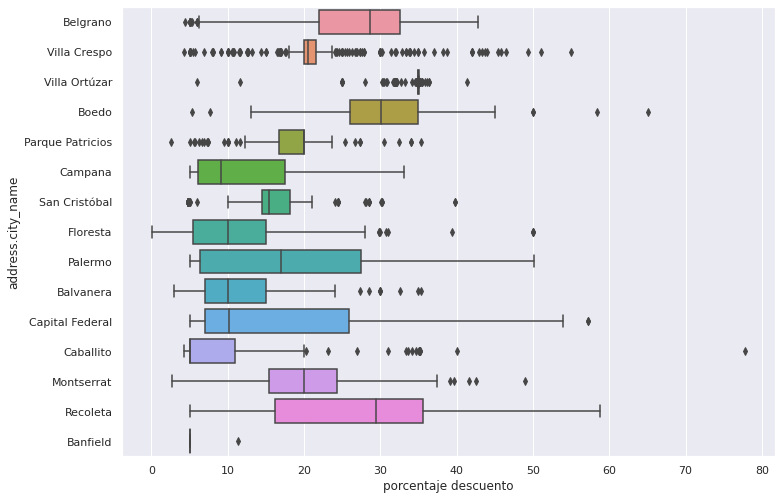

In [16]:
sns.boxplot(y="address.city_name",x='porcentaje descuento', data=aux)

**La ciudad con de Villa Crespo tiene el 19% de los productos con descuento, pero dentro de esos productos la tasa de descuento se encuentra centrada en el 20% con muy poca variacion.
Las ciudades de Recolesta y Palermo ofrecen una mayor variacion en los descuentos ofrecidos**

In [17]:
# Cantidad vendida con respecto a si tiene descuento

In [18]:
def test_son_independientes(df, columna1, columna2):
    contigency=pd.crosstab(df[columna1], df[columna2]) 
    chi, pval, dof, exp = chi2_contingency(contigency)
    significance = 0.05
    if pval < significance:
        return False
    else:
        return True

# Garantia de los productos con respecto a los descuentos

In [19]:
pd.crosstab(df.flag_descuento, df['sale_terms_Tipo de garantía'])

sale_terms_Tipo de garantía,Garantía de fábrica,Garantía del vendedor,Sin garantía
flag_descuento,,,
False,27097,22574,31101
True,2599,1449,196


In [20]:
test_son_independientes(df, 'flag_descuento', 'sale_terms_Tipo de garantía')

False

**Realizando un analisis de hipotesis se pueden confirmas que aa garantia ofrecida por el producto tiene una relacion de dependencia con el descuento ofrecido. Por lo cual esta variable tiene una relacion significativa para utilizarla en el modelo**

<AxesSubplot:xlabel='category_name', ylabel='address.city_name'>

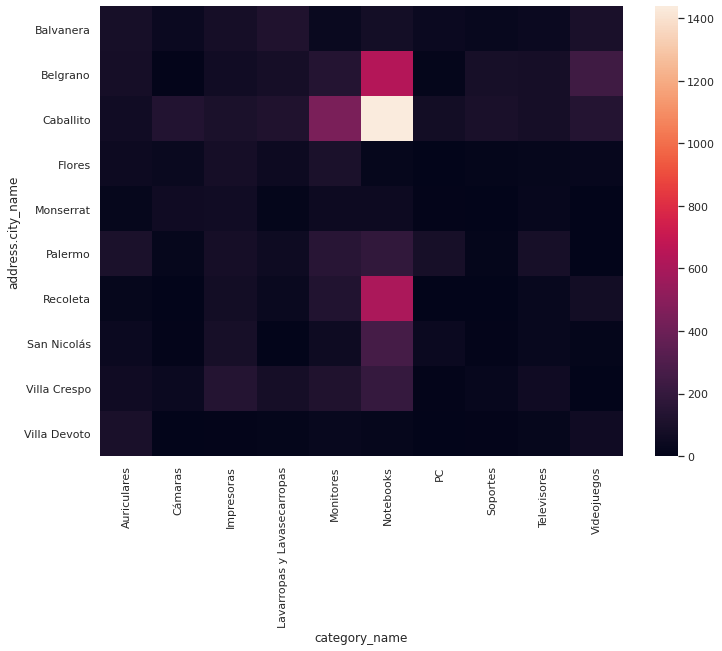

In [37]:
aux = df[(df["address.city_name"].isin(ciudadesMasImportantes.index))&
         (df["category_name"].isin(categoriasPrincipalesDescuento.index))]
sns.heatmap(pd.crosstab(aux["address.city_name"],df["category_name"]))

**Dentro de caballito se puede encontrar los productos de monitores, notebooks, PC y soportes**